In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("credit_data.csv")
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:
cat_cols = df.select_dtypes("O").columns
cat_cols

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [5]:
cat_cols1 = cat_cols[:3]
cat_cols2 = cat_cols[3:6]
cat_cols3 = cat_cols[6:9]
cat_cols4 = cat_cols[9:]

In [6]:
for cat_col in cat_cols1:
    print(df[cat_col].value_counts())
    print()


account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64

credit_history
existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: count, dtype: int64

purpose
domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining 

In [7]:
for cat_col in cat_cols2:
    print(df[cat_col].value_counts())
    print()

savings
... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: count, dtype: int64

present_emp_since
1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: count, dtype: int64

personal_status_sex
male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: count, dtype: int64



In [8]:
for cat_col in cat_cols3:
    print(df[cat_col].value_counts())
    print()

other_debtors
none            907
guarantor        52
co-applicant     41
Name: count, dtype: int64

property
if not A121/A122 : car or other, not in attribute 6                 332
real estate                                                         282
if not A121 : building society savings agreement/ life insurance    232
unknown / no property                                               154
Name: count, dtype: int64

other_installment_plans
none      814
bank      139
stores     47
Name: count, dtype: int64



In [9]:
for cat_col in cat_cols4:
    print(df[cat_col].value_counts())
    print()

housing
own         713
rent        179
for free    108
Name: count, dtype: int64

job
skilled employee / official                                      630
unskilled - resident                                             200
management/ self-employed/ highly qualified employee/ officer    148
unemployed/ unskilled - non-resident                              22
Name: count, dtype: int64

telephone
none                                         596
yes, registered under the customers name     404
Name: count, dtype: int64

foreign_worker
yes    963
no      37
Name: count, dtype: int64



In [10]:
num_cols = [col for col in df.columns if col not in cat_cols and col != "default"]
num_cols

['duration_in_month',
 'credit_amount',
 'installment_as_income_perc',
 'present_res_since',
 'age',
 'credits_this_bank',
 'people_under_maintenance']

In [11]:
df[num_cols].describe()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<Axes: >

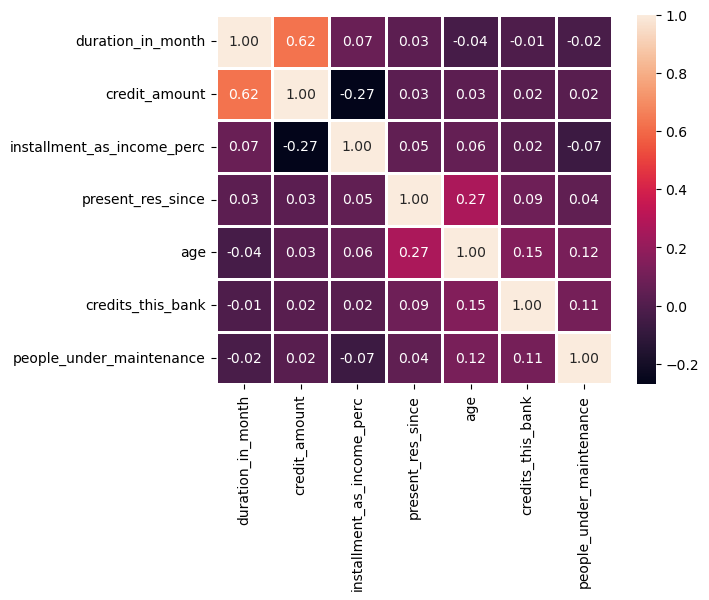

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[num_cols].corr(), annot = True, fmt = "0.2f", linewidths = 2)

## Exploratory data analysis

#### Target mean analysis by category


account_check_status
0 <= ... < 200 DM                                     0.390335
< 0 DM                                                0.492701
>= 200 DM / salary assignments for at least 1 year    0.222222
no checking account                                   0.116751
Name: default, dtype: float64


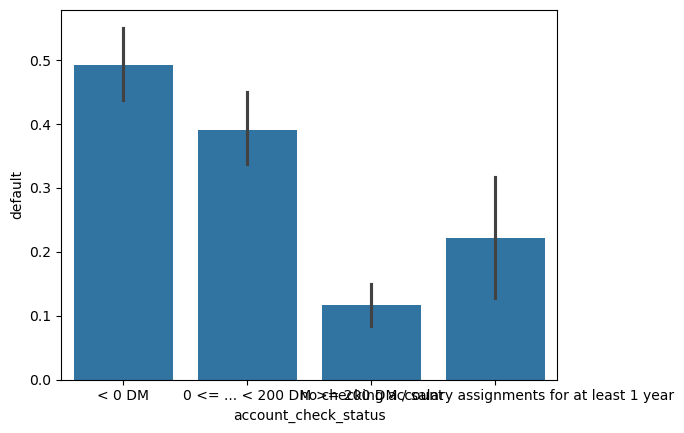

------------------
credit_history
all credits at this bank paid back duly                        0.571429
critical account/ other credits existing (not at this bank)    0.170648
delay in paying off in the past                                0.318182
existing credits paid back duly till now                       0.318868
no credits taken/ all credits paid back duly                   0.625000
Name: default, dtype: float64


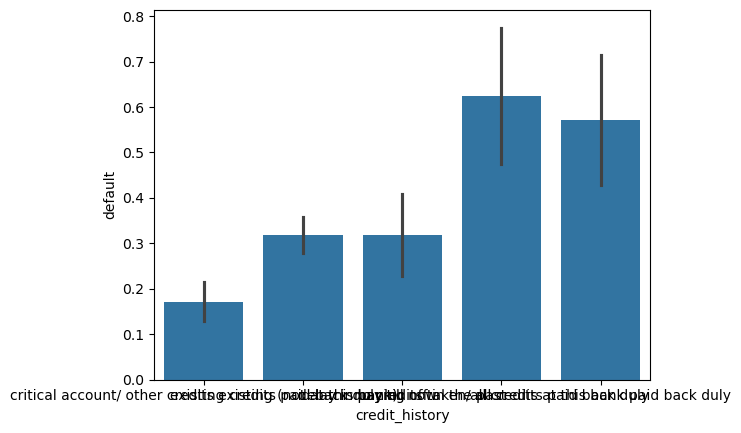

------------------
purpose
(vacation - does not exist?)    0.440000
business                        0.350515
car (new)                       0.380342
car (used)                      0.165049
domestic appliances             0.221429
education                       0.363636
furniture/equipment             0.416667
radio/television                0.320442
repairs                         0.333333
retraining                      0.111111
Name: default, dtype: float64


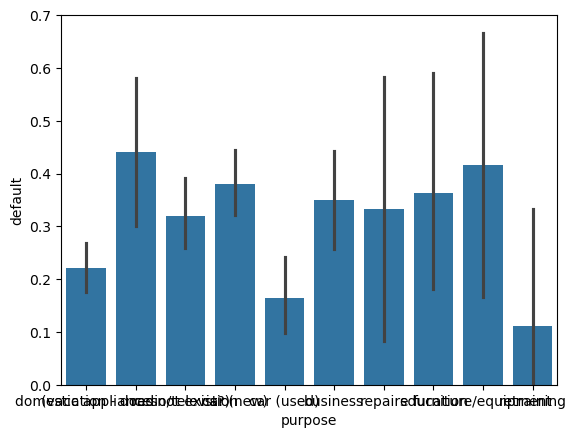

------------------


In [13]:
for cat_col in cat_cols1:
    print(df.groupby(cat_col)["default"].mean())
    sns.barplot(x = cat_col, y = "default", data = df, estimator = "mean")
    plt.show()
    print("------------------")

### Chi-square test to Independence

Interpretation: 
If p-value < 0.05, the feature is likely related to the target.  

If p-value >= 0.05, no significant relationship exists. 


In [14]:
from scipy.stats import chi2_contingency
for cat_col in cat_cols1:
    contingency_table = pd.crosstab(df[cat_col], df["default"])
    print(contingency_table)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print("______________category: {} \n p value: {}________".format(cat_col,p_value))


default                                               0    1
account_check_status                                        
0 <= ... < 200 DM                                   164  105
< 0 DM                                              139  135
>= 200 DM / salary assignments for at least 1 year   49   14
no checking account                                 348   46
______________category: account_check_status 
 p value: 1.218902072289385e-26________
default                                               0    1
credit_history                                              
all credits at this bank paid back duly              21   28
critical account/ other credits existing (not a...  243   50
delay in paying off in the past                      60   28
existing credits paid back duly till now            361  169
no credits taken/ all credits paid back duly         15   25
______________category: credit_history 
 p value: 1.2791872956750962e-12________
default                         0   1
pu

### Random forest feature importance

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ("model", RandomForestClassifier(random_state=42))
])
for cat_col in cat_cols1:
    pipeline.fit(df[[cat_col]], df["default"])
    print(cat_col)
    print(pipeline.named_steps["model"].feature_importances_)

account_check_status
[0.13684809 0.33740037 0.04496804 0.4807835 ]
credit_history
[0.21804861 0.38298477 0.04969071 0.11909821 0.23017769]
purpose
[0.11993345 0.04118327 0.15968888 0.25035742 0.22135472 0.03305988
 0.0436491  0.05148291 0.02523171 0.05405865]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify=y)

pipeline.fit(df[cat_cols], df["default"])


NameError: name 'X' is not defined

In [ ]:
import category_encoders as ce 
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold


In [ ]:
l1 = []
l1.extend(num_cols)
l1.extend(cat_cols1)
l1

['duration_in_month',
 'credit_amount',
 'installment_as_income_perc',
 'present_res_since',
 'age',
 'credits_this_bank',
 'people_under_maintenance',
 'account_check_status',
 'credit_history',
 'purpose']

In [ ]:
## Target Encoding

## Split data into features and target
X = df[l1]
y = df["default"]

## Cross-Valudation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

## Target Encoding with smoothing
encoder_1 = ce.TargetEncoder(cols = cat_cols1, smoothing = 0.1)



In [ ]:
cat_cols1

Index(['account_check_status', 'credit_history', 'purpose'], dtype='object')

In [ ]:
for train_split, val_split in kfold.split(X):
    X_train, X_val = X.iloc[train_split], X.iloc[val_split]
    y_train, y_val = y.iloc[train_split], y.iloc[val_split]
    print(X_train[cat_cols1].columns)
    ## Target encoding based on train data
    te = encoder_1.fit(X_train[cat_cols1], y_train)

    ## Transforming
    X_train_encoded = te.transform(X_train[cat_cols1], y_train)
    X_val_encoded = te.transform(X_val[cat_cols1], y_val)

    X_train_encoded = pd.concat([X_train[num_cols], X_train_encoded], axis = 1)
    X_val_encoded = pd.concat([X_val[num_cols], X_val_encoded], axis = 1)


    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_encoded, y_train)

    ##predictions
    ### Get prediction probabilities for class 1, i.e., case where deault = 1
    y_pred_prob = model.predict_proba(X_val_encoded)[:,1]
    y_pred = model.predict(X_val_encoded)

    ### Evaluate the model
    roc_auc = roc_auc_score(y_val, y_pred_prob)
    recall = recall_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)

    print("ROC: {} \n Recall : {} \n Precision : {} \n F1_score : {}".format(roc_auc, recall, precision, f1))



Index(['account_check_status', 'credit_history', 'purpose'], dtype='object')
ROC: 0.7803822574828706 
 Recall : 0.4067796610169492 
 Precision : 0.6857142857142857 
 F1_score : 0.5106382978723404
Index(['account_check_status', 'credit_history', 'purpose'], dtype='object')
ROC: 0.7786993629041953 
 Recall : 0.4067796610169492 
 Precision : 0.6857142857142857 
 F1_score : 0.5106382978723404
Index(['account_check_status', 'credit_history', 'purpose'], dtype='object')
ROC: 0.7085624509033779 
 Recall : 0.4626865671641791 
 Precision : 0.5849056603773585 
 F1_score : 0.5166666666666667
Index(['account_check_status', 'credit_history', 'purpose'], dtype='object')
ROC: 0.785141065830721 
 Recall : 0.43636363636363634 
 Precision : 0.6857142857142857 
 F1_score : 0.5333333333333333
Index(['account_check_status', 'credit_history', 'purpose'], dtype='object')
ROC: 0.8066071428571427 
 Recall : 0.5333333333333333 
 Precision : 0.6530612244897959 
 F1_score : 0.5871559633027523
